In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind, mannwhitneyu

In [2]:
d = pd.read_csv('marketing_campaign.csv')

In [7]:
d[['exp_group', 'Response']]

,exp_group,Response
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
2211,1,0
2212,0,0
2213,0,0
2214,0,0


In [8]:
d.groupby(['exp_group'])['Response'].mean()

exp_group
0    0.133032
1    0.167417
Name: Response, dtype: float64

In [10]:
proportions_ztest

<function statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)>

In [14]:
succ1 = d[d.exp_group==1].Response.sum()
succ0 = d[d.exp_group==0].Response.sum()

nobs1 = len(d[d.exp_group==1])
nobs0 = len(d[d.exp_group==0])

In [15]:
proportions_ztest([succ1, succ0], [nobs1, nobs0])

(2.264882366520813, 0.023519899140969507)

In [19]:
d.groupby(['exp_group']).agg({'MntTotal': ['mean', 'median']})

MntTotal       
                 mean median
exp_group                   
0          602.460633    404
1          611.665167    382

In [22]:
d.groupby(['exp_group'])['MntTotal'].mean()

exp_group
0    602.460633
1    611.665167
Name: MntTotal, dtype: float64

In [23]:
d.groupby(['exp_group'])['MntTotal'].median()

exp_group
0    404
1    382
Name: MntTotal, dtype: int64

<AxesSubplot:xlabel='MntTotal'>

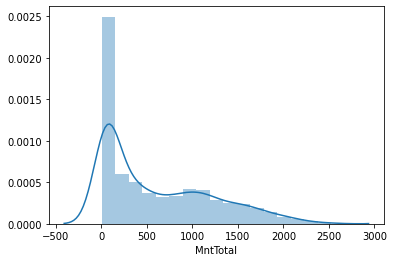

In [21]:
sns.distplot(d['MntTotal'])

In [25]:
ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)>

In [27]:
ttest_ind(d[d.exp_group==1]['MntTotal'], d[d.exp_group==0]['MntTotal'])

Ttest_indResult(statistic=0.3592725417012167, pvalue=0.7194254740326176)

In [29]:
mannwhitneyu(d[d.exp_group==1]['MntTotal'], d[d.exp_group==0]['MntTotal'])

MannwhitneyuResult(statistic=616955.5, pvalue=0.8354885772641296)